# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Efrado Suryadi
- **Email:** efradosuryadi@gmail.com
- **ID Dicoding:** efrado_suryadi_tPYl

## Menentukan Pertanyaan Bisnis

- Bagaimana bentuk pola temperatur di salah satu stasiun?
- Bagaimana kondisi perubahan peningkatan jumlah polutan dari salah satu stasiun?

## Import Semua Packages/Library yang Digunakan

Imports for dealing with data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Imports for dealing with files paths:

In [2]:
import os

## Data Wrangling

### Data information

#### Data source

Data source for this project is downloaded from the https://github.com/marceloreis/HTI/tree/master. The repository consists of monitoring data of air quality from stations in Beijing, China, which includes:

- Aotizhongxin
- Changping
- Dingling
- Dongsi
- Guanyuan
- Gucheng
- Huairou
- Nongzhanguan
- Shunyi
- Tiantan
- Wanliu
- Wanshouxigong

#### Data features

Features on the data and their explanations:

- `No` : An index or row data for identifying row of data.
- `year`: The year of the recorded data.
- `month`: The month of the recorded data.
- `day`: The day of the month of the recorded data.
- `hour`: The hour of the day (0-23) when the observation was made.
- `PM2.5`: Concentration of particulate matter with a diameter of 2.5 micrometers or smaller (measured in µg/m³). The higher its level is, the more dangerous it is, as it can affect health condition, especially respitory conditions.
- `PM10`: Concentration of particulate matter with a diameter of 10 micrometers or smaller (measured in µg/m³). Similar to PM2.5 but includes larger particles; important for assessing overall air quality.
- `SO2`: Concentration of sulfur dioxide (measured in µg/m³). A pollutant that can come from industrial processes and fossil fuel combustion; high levels can cause respiratory problems.
- `NO2`: Concentration of nitrogen dioxide (measured in µg/m³). A pollutant from vehicle emissions and other sources; contributes to smog and can affect lung function.
- `CO`: Concentration of carbon monoxide (measured in µg/m³). A colorless, odorless gas produced by incomplete combustion; can be harmful at high levels.
- `O3`: Concentration of ozone (measured in µg/m³). Ground-level ozone is a key component of smog and can harm health and the environment; usually forms in the presence of sunlight.
- `TEMP`: Temperature (measured in degrees Celsius). Provides context for air quality readings; can influence pollutant concentrations and reactions.
- `PRES`: Atmospheric pressure (measured in hPa or millibars). Important for understanding weather patterns and conditions affecting air quality.
- `DEWP`: Dew point temperature (measured in degrees Celsius). Indicates humidity levels and can help understand weather conditions affecting air quality.
- `RAIN`: Amount of rainfall (measured in mm). Rain can help clear pollutants from the air, so it's important for understanding air quality variations.
- `wd`: Wind direction (usually measured in degrees). Provides information about the source of air pollutants and can affect dispersion.
- `WSPM`: Wind speed (measured in meters per second or km/h). Important for understanding how pollutants disperse in the atmosphere.
- `station`: Identifier or name of the monitoring station where the data was collected. Helps identify the geographical location of the measurements, which is crucial for spatial analysis of air quality.

### Gathering Data

#### Reading data from the `data` directory

Get the directory path of `data` directory that consists of all of the `csv` files:

In [3]:
data_path = os.path.join(os.getcwd(), "data")

Get the name of all `.csv` files as a list:

In [4]:
csv_files = os.listdir(data_path)
csv_files

['PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Shunyi_20130301-20170228.csv',
 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']

Examples of opening one `.csv` file from the `data` directory (`Aotizhongxin` in this case):

In [5]:
example_df = pd.read_csv(os.path.join(data_path, csv_files[0]))
example_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


#### Combining all data from csv into one `main_df`

In [6]:
csv_dataframes = []

for csv_file in csv_files:
    df = pd.read_csv(os.path.join(data_path, csv_file))
    csv_dataframes.append(df)

In [63]:
main_df = pd.concat(csv_dataframes, ignore_index=True).drop(columns=['No'])
main_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong



#### Handling time features in the dataframe
As we can see that the time related features takes up too much columns in the dataframe, and I don't think this assignment of mine would need the time information to be so detailed, so, I decided to combine all of the time related columns, `year`, `month`, `day`, `hour`, into just one column features named `time`.


In [64]:
# Make the ['date_time'] column
main_df['date_time'] = pd.to_datetime(main_df[['year', 'month', 'day', 'hour']])

# drop the originals columns
main_df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

In [65]:
# move the 'date_time' column to the leftmost position
columns = ['date_time'] + [col for col in main_df.columns if col != 'date_time']

main_df = main_df[columns]
main_df

,date_time,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017-02-28 19:00:00,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017-02-28 20:00:00,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017-02-28 21:00:00,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017-02-28 22:00:00,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


### Assessing Data

#### Checking object info of `main_df`:
Now check on the object type of each column in the dataframe:

In [66]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date_time  420768 non-null  datetime64[ns]
 1   PM2.5      412029 non-null  float64       
 2   PM10       414319 non-null  float64       
 3   SO2        411747 non-null  float64       
 4   NO2        408652 non-null  float64       
 5   CO         400067 non-null  float64       
 6   O3         407491 non-null  float64       
 7   TEMP       420370 non-null  float64       
 8   PRES       420375 non-null  float64       
 9   DEWP       420365 non-null  float64       
 10  RAIN       420378 non-null  float64       
 11  wd         418946 non-null  object        
 12  WSPM       420450 non-null  float64       
 13  station    420768 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 44.9+ MB


#### Checking null values in `main_df`:
Checking null values:

In [67]:
print("Air qualities' data null value:")
main_df.isna().sum()

Air qualities' data null value:


date_time        0
PM2.5         8739
PM10          6449
SO2           9021
NO2          12116
CO           20701
O3           13277
TEMP           398
PRES           393
DEWP           403
RAIN           390
wd            1822
WSPM           318
station          0
dtype: int64

As we can see that there are many null values in the numerical data in each stations. This problem will be handle later in the **cleaning data** section.

#### Checking duplicates in `main_df`:
Air qualities' data duplicate test:

In [68]:
print("Air quality data duplicated sum: ", main_df.duplicated().sum())

Air quality data duplicated sum:  0


No duplicates, this mean that we won't need to handle duplicate problem.

#### Checking descriptive statistic in `main_df`:
Checking description on the `main_df` using descriptive statistics method.

In [69]:
main_df.describe()

,date_time,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2015-03-01 11:30:00.000001024,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
min,2013-03-01 00:00:00,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014-03-01 05:45:00,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015-03-01 11:30:00,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016-02-29 17:15:00,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017-02-28 23:00:00,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000
std,NaN,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386


#### Insights on assessing data

As we've seen in the assessment process of the data, there are several problems that I would like to fix:

1. Cleaning null values.
2. As there is no duplicated data, there's no need to solve this problem.

### Cleaning Data

#### Handling null values

Since the data in this dataset shows a trend, I decided the best way to solve the null values problem is by using interpolation. The interpolation would be done by taking each station data out of the `main_df`, then interpolate each quantitative data features in both station. On `wd` feature which I think I wouldn't be using.

Before filling the null value of each numerical data, I would the current condition on the data first.

Here's how the null value condition of each data is right now:

In [77]:
main_df.isna().sum()

date_time        0
PM2.5         8739
PM10          6449
SO2           9021
NO2          12116
CO           20701
O3           13277
TEMP           398
PRES           393
DEWP           403
RAIN           390
wd            1822
WSPM           318
station          0
dtype: int64

Before fixing the null value problem. I would like to show a condition of the current condition of the data that comes with a null value as shown using the plot below, from one of a station and some time range of it:

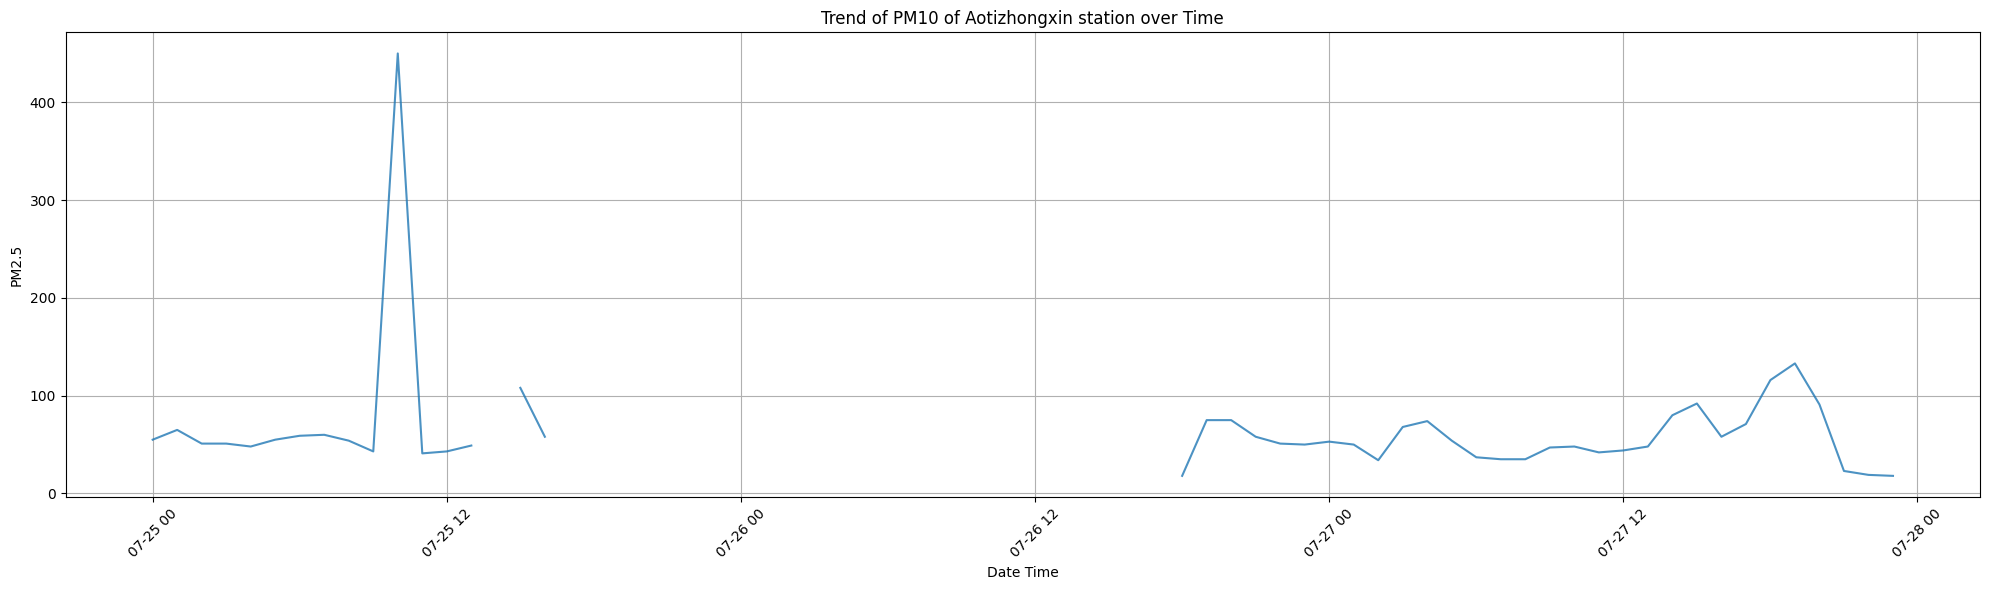

In [78]:
# Create a scatter plot
temp_df = main_df[main_df['station'] == 'Aotizhongxin']
temp_df = temp_df[(temp_df['date_time'].dt.year == 2016) & (temp_df['date_time'].dt.month == 7) & (temp_df['date_time'].dt.day <= 27) & (temp_df['date_time'].dt.day >= 25)]
plt.figure(figsize=(20, 6))
plt.plot(temp_df['date_time'], temp_df['PM10'], alpha=0.8)
plt.title('Trend of PM10 of Aotizhongxin station over Time')
plt.xlabel('Date Time')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

As we can see from the example above that there are missing values on the `PM10` data of the `Aotizhongxin` station at day 26. To solve this problem I would like to interpolate all of the numerical data of the features in the data.

In [79]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date_time  420768 non-null  datetime64[ns]
 1   PM2.5      412029 non-null  float64       
 2   PM10       414319 non-null  float64       
 3   SO2        411747 non-null  float64       
 4   NO2        408652 non-null  float64       
 5   CO         400067 non-null  float64       
 6   O3         407491 non-null  float64       
 7   TEMP       420370 non-null  float64       
 8   PRES       420375 non-null  float64       
 9   DEWP       420365 non-null  float64       
 10  RAIN       420378 non-null  float64       
 11  wd         418946 non-null  object        
 12  WSPM       420450 non-null  float64       
 13  station    420768 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 44.9+ MB


Since all of the numerical data in the data above has the type of `float64`, I would then apply the function of interpolation using this information. Interpolation will be done for each station, so the interpolation wouldn't go wrong at both end of data, which might happen because the function thinks the end data of one station is related to others.

In [82]:
# Function for interpolating float64 features within each station
def interpolate_float64_per_station(df, station_col):
    # Put df into temp_df so the original dataframe wouldn't get rewritten
    temp_df = df.copy()

    # Get columns with dtype float64
    float64_cols = temp_df.select_dtypes(include=['float64']).columns

    # Group by station and apply interpolation to float64 columns
    temp_df[float64_cols] = temp_df.groupby(station_col)[float64_cols].apply(lambda group: group.interpolate()).reset_index(drop=True)
    
    return temp_df

In [90]:
interpolated_main_df = interpolate_float64_per_station(main_df, 'station')

Now we can see that the null value is mostly fixed now in the `interpolated_main_df`, which can be seen by the difference of `isna().sum()` between `main_df` and `interpolated_main_df`.

In [43]:
main_df.isna().sum()

date_time        0
PM2.5         8739
PM10          6449
SO2           9021
NO2          12116
CO           20701
O3           13277
TEMP           398
PRES           393
DEWP           403
RAIN           390
wd            1822
WSPM           318
station          0
dtype: int64

In [91]:
interpolated_main_df.isna().sum()

date_time       0
PM2.5           0
PM10            0
SO2             0
NO2            22
CO              0
O3              0
TEMP            0
PRES            0
DEWP            0
RAIN            0
wd           1822
WSPM            0
station         0
dtype: int64

In [92]:
interpolated_main_df

,date_time,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017-02-28 19:00:00,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017-02-28 20:00:00,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017-02-28 21:00:00,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017-02-28 22:00:00,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


Now the plot as with the same time range and feature in `main_df` would become this in `interpolated_main_df`

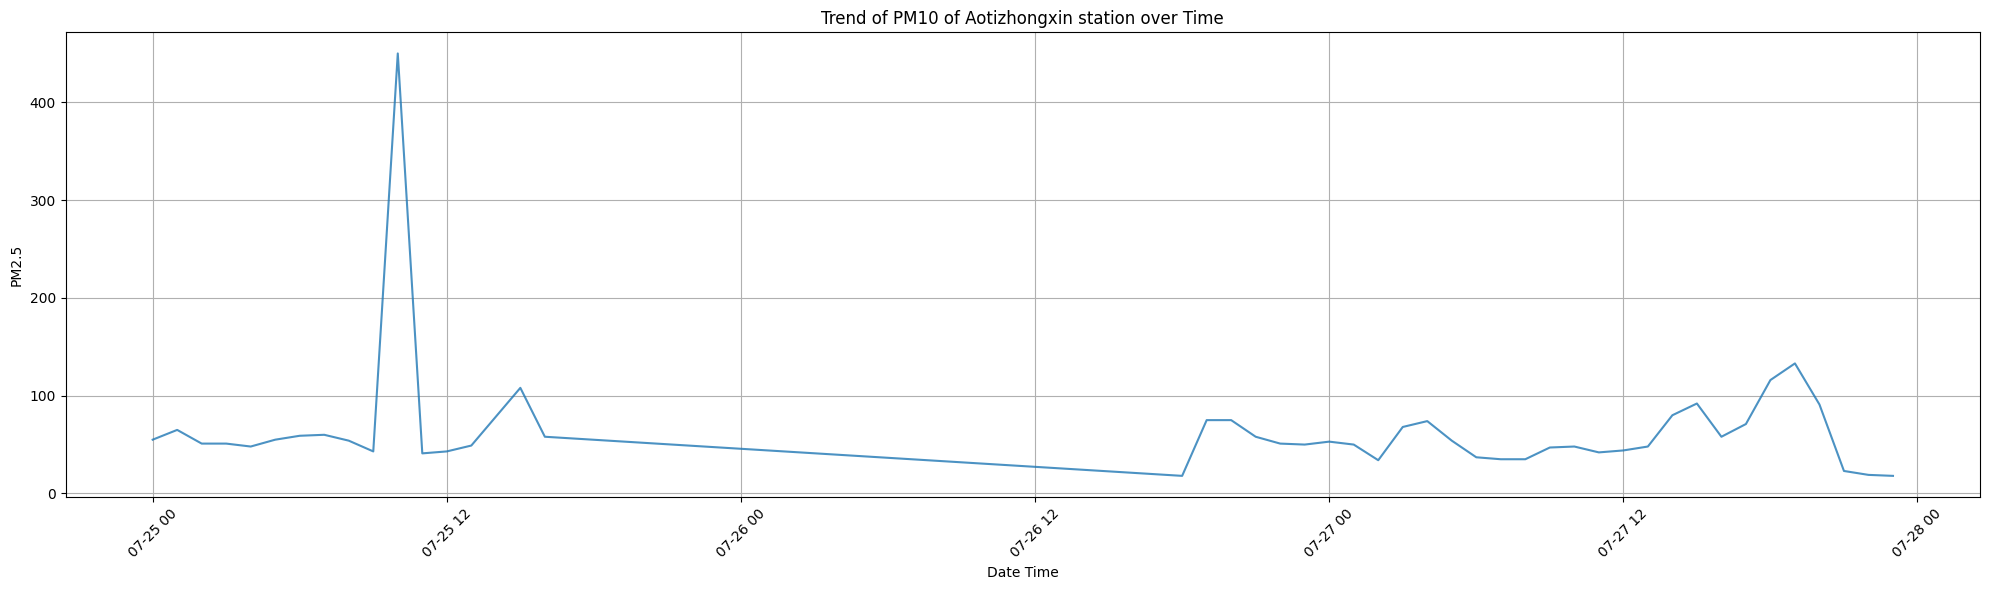

In [93]:
# Create a scatter plot
temp_df = interpolated_main_df[interpolated_main_df['station'] == 'Aotizhongxin']
temp_df = temp_df[(temp_df['date_time'].dt.year == 2016) & (temp_df['date_time'].dt.month == 7) & (temp_df['date_time'].dt.day <= 27) & (temp_df['date_time'].dt.day >= 25)]
plt.figure(figsize=(20, 6))
plt.plot(temp_df['date_time'], temp_df['PM10'], alpha=0.8)
plt.title('Trend of PM10 of Aotizhongxin station over Time')
plt.xlabel('Date Time')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Insight:**
- xxx
- xxx

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2